In [2]:
import pandas as pd

# Load the datasets
matches_df = pd.read_csv('ipl_2024_matches.csv')
deliveries_df = pd.read_csv('ipl_2024_deliveries.csv')

# Display the first few rows of each dataframe
print("Matches DataFrame:")
print(matches_df.head())

print("\nDeliveries DataFrame:")
print(deliveries_df.head())


Matches DataFrame:
   match_id  season        date  match_no  \
0    202401    2024  2024-03-22         1   
1    202402    2024  2024-03-23         2   
2    202403    2024  2024-03-23         3   
3    202404    2024  2024-03-24         4   
4    202405    2024  2024-03-24         5   

                                               venue       city team1 team2  \
0           MA Chidambaram Stadium, Chepauk, Chennai    Chennai   RCB   CSK   
1  Maharaja Yadavindra Singh International Cricke...     Mohali    DC  PBKS   
2                              Eden Gardens, Kolkata    Kolkata   KKR   SRH   
3                     Sawai Mansingh Stadium, Jaipur     Jaipur    RR   LSG   
4                   Narendra Modi Stadium, Ahmedabad  Ahmedabad    GT    MI   

  toss_winner toss_decision  ...  innings2_wickets  winning_team  margin  \
0         RCB           bat  ...               4.0           CSK     6.0   
1        PBKS         field  ...               6.0          PBKS     4.0   
2      

win and loss

Win/Loss Ratio:
CSK     1.000000
DC      1.000000
GT      0.555556
KKR     2.200000
LSG     1.000000
MI      0.400000
PBKS    0.555556
RCB     0.875000
RR      1.285714
SRH     1.125000
Name: count, dtype: float64


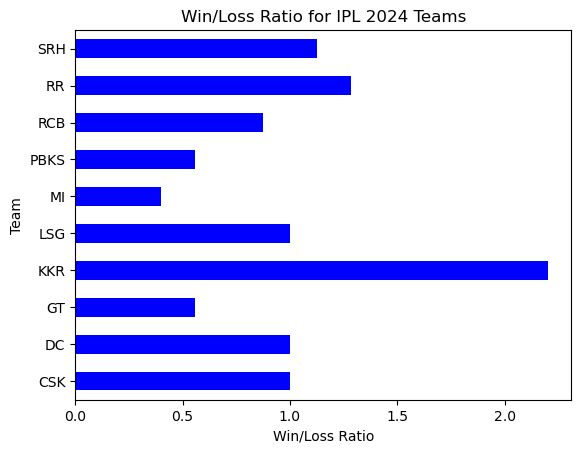

In [4]:
# Calculate win/loss ratio
team_wins = matches_df['winning_team'].value_counts()
total_matches = matches_df['team1'].value_counts() + matches_df['team2'].value_counts()

win_loss_ratio = team_wins / (total_matches - team_wins)
print("Win/Loss Ratio:")
print(win_loss_ratio)

# Visualize win/loss ratio
import matplotlib.pyplot as plt

win_loss_ratio.plot(kind='barh', color='blue')
plt.title('Win/Loss Ratio for IPL 2024 Teams')
plt.xlabel('Win/Loss Ratio')
plt.ylabel('Team')
plt.show()


Top 10 Players by Strike Rate:
striker
L Wood             300.000000
R Shepherd         271.428571
J Fraser-McGurk    234.042553
MS Dhoni           220.547945
R Sai Kishore      216.666667
KV Sharma          206.666667
Abhishek Sharma    204.219409
Ramandeep Singh    201.612903
Mohsin Khan        200.000000
Avesh Khan         200.000000
dtype: float64


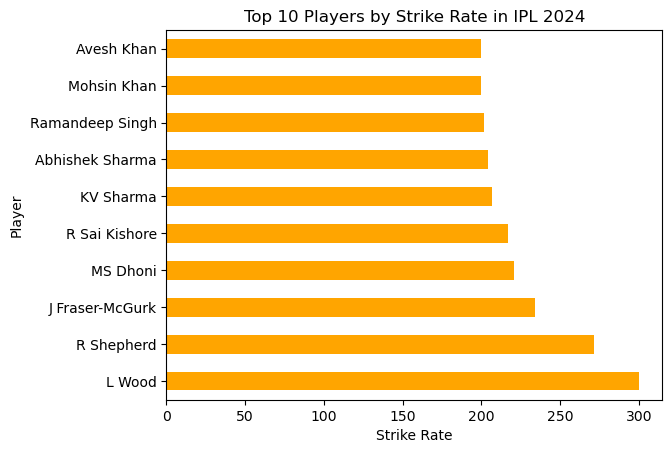

In [11]:
# Calculate total runs and total balls faced by each player
player_runs = deliveries_df.groupby('striker')['runs_of_bat'].sum()
balls_faced = deliveries_df[deliveries_df['wide'] == 0].groupby('striker').size()

strike_rate = (player_runs / balls_faced) * 100
strike_rate = strike_rate.sort_values(ascending=False)

print("Top 10 Players by Strike Rate:")
print(strike_rate.head(10))

# Visualization
strike_rate.head(10).plot(kind='barh', color='orange')
plt.title('Top 10 Players by Strike Rate in IPL 2024')
plt.xlabel('Strike Rate')
plt.ylabel('Player')
plt.show()


In [13]:
# Calculate total runs by each player
total_runs = deliveries_df.groupby('striker')['runs_of_bat'].sum()
highest_scorer = total_runs.idxmax()
highest_runs = total_runs.max()

# Find the team of the highest run-scorer
player_team = deliveries_df[deliveries_df['striker'] == highest_scorer]['batting_team'].unique()[0]

print(f"The highest run-scorer is {highest_scorer} from {player_team} with {highest_runs} runs.")


The highest run-scorer is V Kohli from RCB with 741 runs.


In [14]:
# Calculate total runs and total balls faced by each player
player_runs = deliveries_df.groupby('striker')['runs_of_bat'].sum()
balls_faced = deliveries_df[deliveries_df['wide'] == 0].groupby('striker').size()

# Calculate strike rate
strike_rate = (player_runs / balls_faced) * 100

# Combine runs and strike rate into a DataFrame for comparison
player_comparison = pd.DataFrame({
    'Total Runs': player_runs,
    'Strike Rate': strike_rate
}).sort_values(by='Total Runs', ascending=False)

print("Top Players by Runs and Strike Rate:")
print(player_comparison.head(10))


Top Players by Runs and Strike Rate:
                 Total Runs  Strike Rate
striker                                 
V Kohli                 741   154.697286
RD Gaikwad              583   141.162228
R Parag                 573   149.218750
TM Head                 567   191.554054
SV Samson               531   153.468208
B Sai Sudharsan         527   141.286863
KL Rahul                520   136.125654
N Pooran                499   178.214286
SP Narine               488   180.740741
Abhishek Sharma         484   204.219409


In [16]:
# Calculate total wickets taken by each bowler
wickets_taken = deliveries_df[deliveries_df['player_dismissed'].notnull() & (deliveries_df['player_dismissed'] != 'run out')].groupby('bowler').size()

print("Top Bowlers by Wickets Taken:")
print(wickets_taken.sort_values(ascending=False).head(10))


Top Bowlers by Wickets Taken:
bowler
HV Patel          30
Mukesh Kumar      22
Avesh Khan        22
JJ Bumrah         21
CV Varun          21
T Natarajan       20
MA Starc          20
Arshdeep Singh    20
Harshit Rana      20
AD Russell        19
dtype: int64


Team Performance by Venue:
winning_team                                        CSK  DC  GT  KKR  LSG  MI  \
venue                                                                           
Arun Jaitley Stadium, Delhi                           0   4   0    0    0   0   
Barsapara Cricket Stadium, Guwahati                   0   0   0    0    0   0   
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cr...    0   1   0    1    4   0   
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...    0   1   0    1    0   0   
Eden Gardens, Kolkata                                 0   0   0    5    0   0   

winning_team                                        PBKS  RCB  RR  SRH  
venue                                                                   
Arun Jaitley Stadium, Delhi                            0    0   0    1  
Barsapara Cricket Stadium, Guwahati                    1    0   0    0  
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cr...     0    0   1    0  
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cric

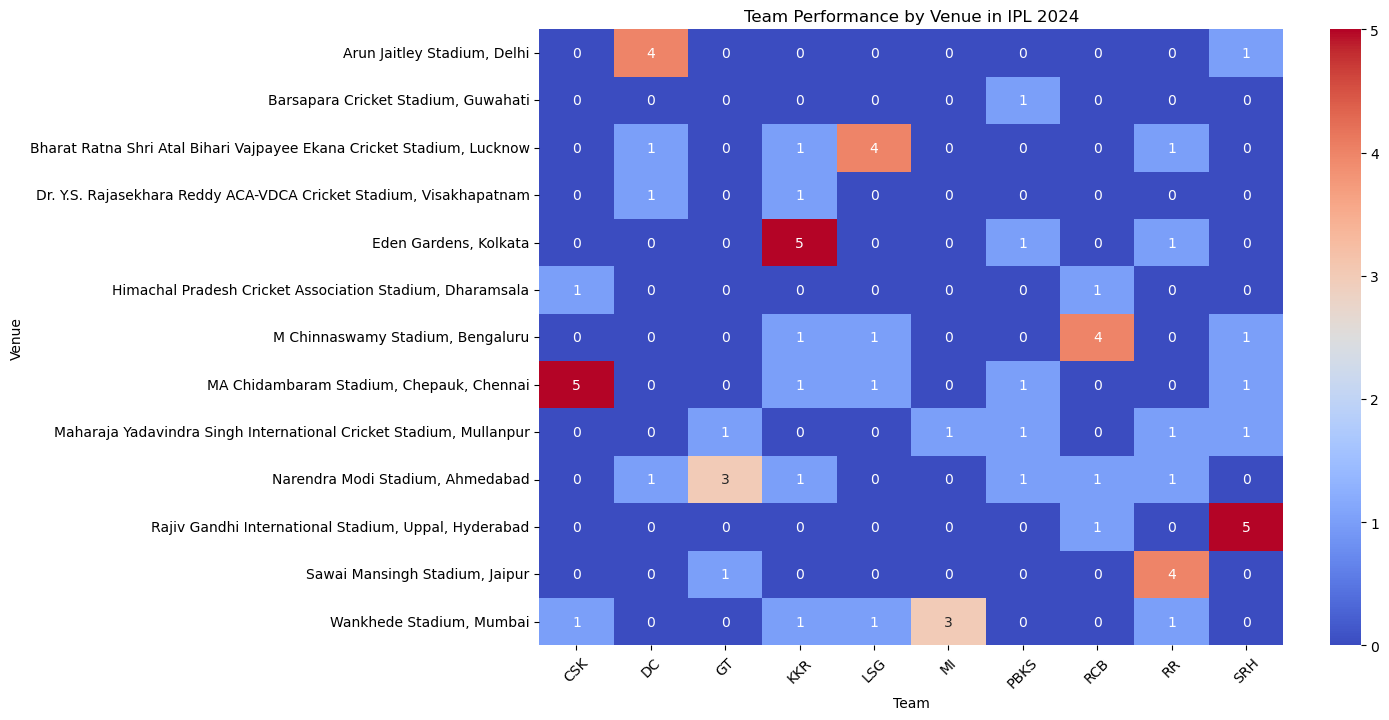

In [18]:
# Calculate the number of matches won by each team at each venue
venue_performance = matches_df.groupby(['venue', 'winning_team']).size().unstack(fill_value=0)

print("Team Performance by Venue:")
print(venue_performance.head())

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(venue_performance, annot=True, cmap='coolwarm')
plt.title('Team Performance by Venue in IPL 2024')
plt.xlabel('Team')
plt.ylabel('Venue')
plt.xticks(rotation=45)
plt.show()


Player Performance by Venue (Top Players):
striker                                             A Badoni  A Kamboj  \
venue                                                                    
Arun Jaitley Stadium, Delhi, Delhi                         6         0   
Barsapara Cricket Stadium, Guwahati, Guwahati              0         0   
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cr...       122         0   
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...         0         0   
Eden Gardens, Kolkata, Kolkata                            29         2   

striker                                             A Manohar  A Nortje  \
venue                                                                     
Arun Jaitley Stadium, Delhi, Delhi                          0         0   
Barsapara Cricket Stadium, Guwahati, Guwahati               0         0   
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cr...          0         0   
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...          0  

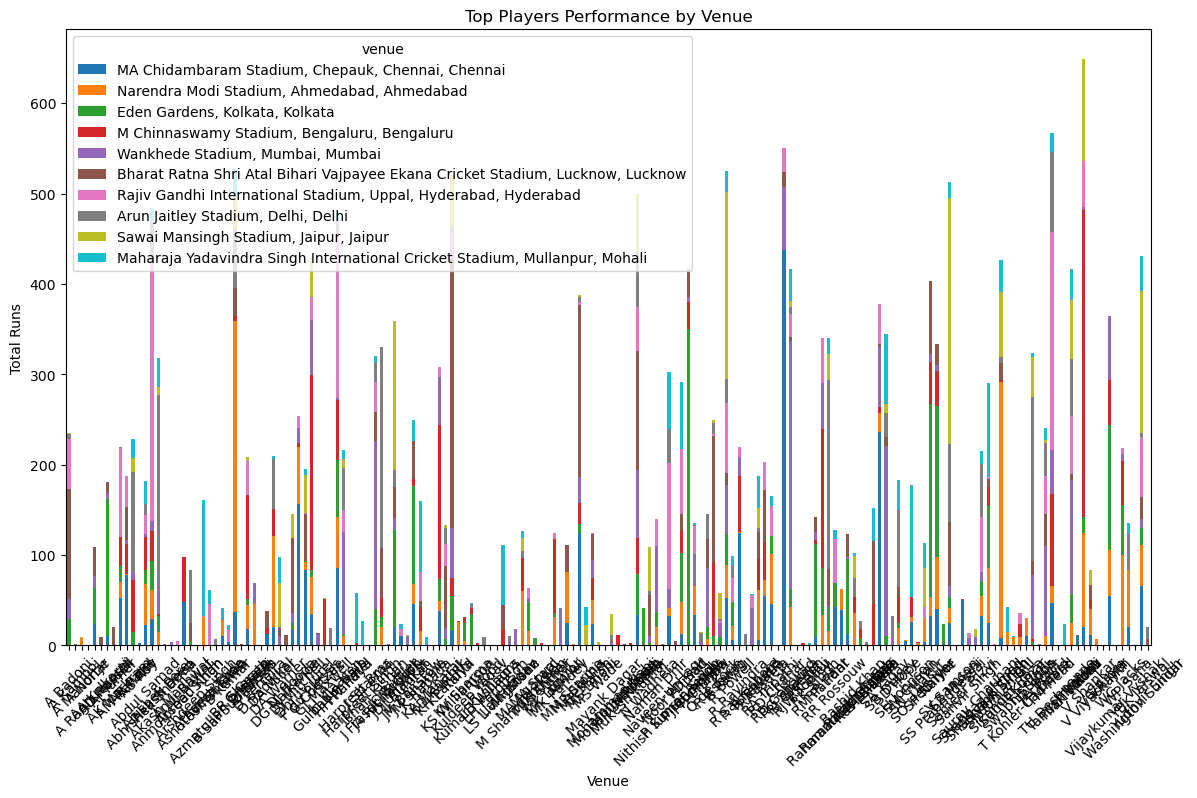

In [19]:
# Calculate total runs scored by each player at each venue
player_venue_runs = deliveries_df.groupby(['venue', 'striker'])['runs_of_bat'].sum().unstack(fill_value=0)

print("Player Performance by Venue (Top Players):")
print(player_venue_runs.head())

# Visualization
top_players = player_venue_runs.sum(axis=1).sort_values(ascending=False).head(10).index
top_player_venue_runs = player_venue_runs.loc[top_players]

top_player_venue_runs.T.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Top Players Performance by Venue')
plt.xlabel('Venue')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()


In [20]:
df_top_player_venue_runs = pd.DataFrame(top_player_venue_runs)

In [21]:
df_top_player_venue_runs

striker,A Badoni,A Kamboj,A Manohar,A Nortje,A Raghuvanshi,AA Kulkarni,AD Russell,AJ Turner,AK Markram,AM Rahane,...,V Shankar,V Viyaskanth,VG Arora,VR Iyer,Vijaykumar Vyshak,WG Jacks,WP Saha,Washington Sundar,YBK Jaiswal,Yudhvir Singh
venue,,,,,,,,,,,,,,,,,,,,,
"MA Chidambaram Stadium, Chepauk, Chennai, Chennai",0,0,0,0,24,0,10,0,53,78,...,12,0,1,55,0,0,21,0,66,0
"Narendra Modi Stadium, Ahmedabad, Ahmedabad",0,0,8,0,0,0,0,0,17,1,...,28,7,0,51,0,100,62,0,45,0
"Eden Gardens, Kolkata, Kolkata",29,2,0,0,40,0,152,0,18,0,...,0,0,0,138,0,55,0,0,19,0
"M Chinnaswamy Stadium, Bengaluru, Bengaluru",0,0,0,0,0,0,0,0,32,33,...,10,0,0,50,1,49,1,0,0,0
"Wankhede Stadium, Mumbai, Mumbai",22,0,0,0,13,0,7,0,0,5,...,0,0,0,70,0,8,0,0,10,0
"Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow, Lucknow",122,0,0,0,32,9,12,21,0,36,...,17,0,0,1,0,0,0,0,24,7
"Rajiv Gandhi International Stadium, Uppal, Hyderabad, Hyderabad",55,0,0,0,0,0,0,0,99,35,...,0,0,0,0,0,6,0,0,67,0
"Arun Jaitley Stadium, Delhi, Delhi",6,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,39,0,4,14
"Sawai Mansingh Stadium, Jaipur, Jaipur",1,0,1,0,0,0,0,0,0,0,...,16,0,0,0,0,0,0,0,157,0


In [23]:
# Calculate win rate for teams winning the toss
toss_wins = matches_df[matches_df['toss_winner'] == matches_df['winning_team']].shape[0]
total_matches = matches_df.shape[0]
toss_win_rate = (toss_wins / total_matches) * 100

print(f"Win rate for teams winning the toss: {toss_win_rate:.2f}%")


Win rate for teams winning the toss: 41.89%


Wins batting first: 71
Wins batting second: 71


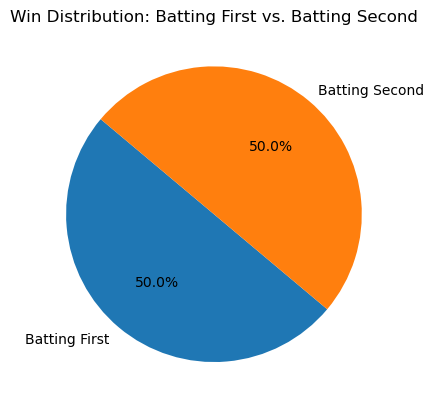

In [25]:
# Calculate number of wins batting first vs. batting second
batting_first_wins = matches_df[matches_df['innings1_score'] > 0].shape[0]
batting_second_wins = matches_df[matches_df['innings2_score'] > 0].shape[0]

print(f"Wins batting first: {batting_first_wins}")
print(f"Wins batting second: {batting_second_wins}")

# Visualization
labels = ['Batting First', 'Batting Second']
wins = [batting_first_wins, batting_second_wins]

plt.pie(wins, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Win Distribution: Batting First vs. Batting Second')
plt.show()


In [26]:
df_batting_first_wins = pd.DataFrame('innings1_score')
df_batting_second_wins = pd.DataFrame('innings2_score')

ValueError: DataFrame constructor not properly called!

In [27]:
# Calculate the number of matches won by each team
team_wins = matches_df['winning_team'].value_counts()

# Calculate the number of matches each team played
total_matches_played = matches_df['team1'].value_counts() + matches_df['team2'].value_counts()

# Calculate the number of losses for each team
team_losses = total_matches_played - team_wins

# Combine the wins and losses into a DataFrame
team_performance = pd.DataFrame({
    'Wins': team_wins,
    'Losses': team_losses
}).fillna(0)  # Fill NaNs with 0 (in case a team has no wins or losses)

print("Team Performance (Wins and Losses):")
print(team_performance)


Team Performance (Wins and Losses):
      Wins  Losses
CSK      7       7
DC       7       7
GT       5       9
KKR     11       5
LSG      7       7
MI       4      10
PBKS     5       9
RCB      7       8
RR       9       7
SRH      9       8


In [35]:
# Select relevant columns for match-wise performance analysis
match_performance = matches_df[['match_id', 'team1', 'team2','toss_winner','toss_decision','innings1_score','innings2_score','winning_team', 'won_by', 'margin', 'player_of_the_match']]

# For each match, determine whether it was a win or loss for both teams
match_performance['team1_result'] = match_performance.apply(
    lambda row: 'Win' if row['team1'] == row['winning_team'] else 'Loss', axis=1
)
match_performance['team2_result'] = match_performance.apply(
    lambda row: 'Win' if row['team2'] == row['winning_team'] else 'Loss', axis=1
)

print("Match-by-Match Team Performance:")
print(match_performance.head())

# Optionally, save this match-wise performance to a CSV file
match_performance.to_csv('team_match_performance.csv', index=False)


Match-by-Match Team Performance:
   match_id team1 team2 toss_winner toss_decision  innings1_score  \
0    202401   RCB   CSK         RCB           bat           173.0   
1    202402    DC  PBKS        PBKS         field           174.0   
2    202403   KKR   SRH         SRH         field           208.0   
3    202404    RR   LSG          RR           bat           193.0   
4    202405    GT    MI          MI         field           168.0   

   innings2_score winning_team   won_by  margin player_of_the_match  \
0           176.0          CSK  wickets     6.0   Mustafizur Rahman   
1           177.0         PBKS  wickets     4.0           SM Curran   
2           204.0          KKR     runs     4.0          AD Russell   
3           173.0           RR     runs    20.0           SV Samson   
4           162.0           GT     runs     6.0     B Sai Sudharsan   

  team1_result team2_result  
0         Loss          Win  
1         Loss          Win  
2          Win         Loss  
3    

C:\Users\sathi\AppData\Local\Temp\ipykernel_15688\274527315.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_performance['team1_result'] = match_performance.apply(
C:\Users\sathi\AppData\Local\Temp\ipykernel_15688\274527315.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_performance['team2_result'] = match_performance.apply(


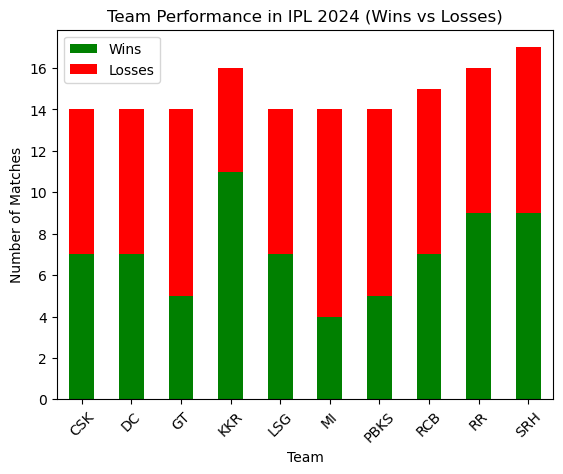

In [36]:
import matplotlib.pyplot as plt

# Plot the win/loss records
team_performance.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Team Performance in IPL 2024 (Wins vs Losses)')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()


TypeError: '>' not supported between instances of 'str' and 'int'

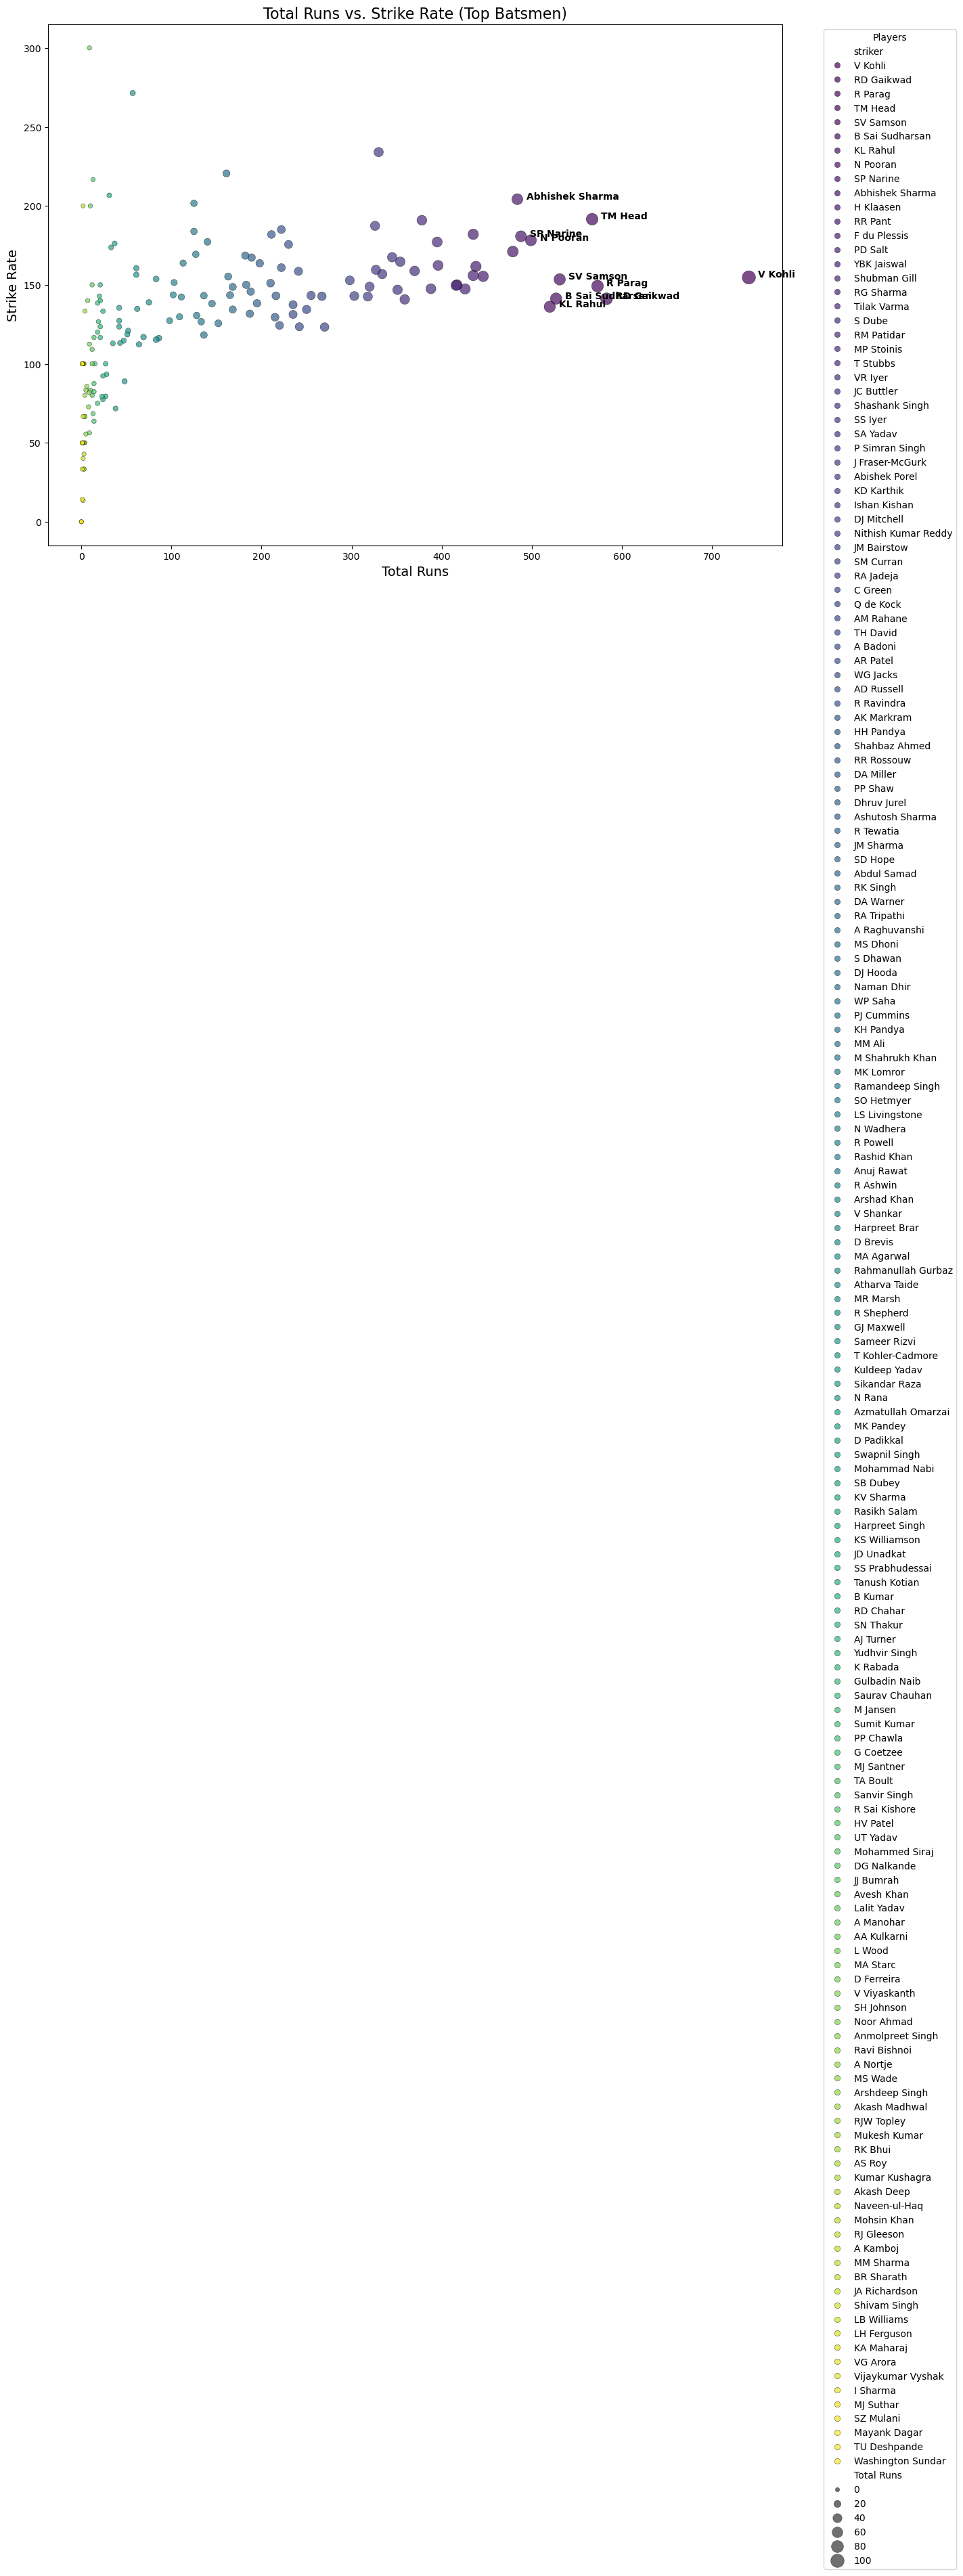

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume player_comparison DataFrame is already created from the previous analysis
# Normalize the size for better visualization
sizes = (player_comparison['Total Runs'] / player_comparison['Total Runs'].max()) * 100

plt.figure(figsize=(14, 10))

# Scatter plot with size, color, and transparency adjustments
sns.scatterplot(
    x=player_comparison['Total Runs'],
    y=player_comparison['Strike Rate'],
    hue=player_comparison.index,
    size=sizes,
    sizes=(20, 200),
    palette='viridis',
    alpha=0.7,
    edgecolor='black'
)

# Annotate top players (e.g., top 10 by runs)
top_players = player_comparison.sort_values(by='Total Runs', ascending=False).head(10)
for i in range(len(top_players)):
    plt.text(
        top_players['Total Runs'].iloc[i] + 10,
        top_players['Strike Rate'].iloc[i],
        top_players.index[i],
        horizontalalignment='left',
        size='medium',
        color='black',
        weight='semibold'
    )

plt.title('Total Runs vs. Strike Rate (Top Batsmen)', fontsize=16)
plt.xlabel('Total Runs', fontsize=14)
plt.ylabel('Strike Rate', fontsize=14)
plt.legend(title='Players', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


In [45]:
# Identify partnerships and calculate their total runs
partnerships = deliveries_df.groupby(['match_id', 'striker', 'non_striker'])['runs_of_bat'].sum().reset_index()
top_partnerships = partnerships.groupby(['striker', 'non_striker'])['runs_of_bat'].sum().sort_values(ascending=False)

print("Top Batting Partnerships:")
print(top_partnerships.head(10))


Top Batting Partnerships:
striker          non_striker    
TM Head          Abhishek Sharma    372
V Kohli          F du Plessis       341
F du Plessis     V Kohli            339
Abhishek Sharma  TM Head            297
PD Salt          SP Narine          293
B Sai Sudharsan  Shubman Gill       260
Shubman Gill     B Sai Sudharsan    255
Ishan Kishan     RG Sharma          245
J Fraser-McGurk  Abishek Porel      219
SP Narine        PD Salt            215
Name: runs_of_bat, dtype: int64


In [49]:
# Calculate runs conceded and balls bowled for each bowler
bowler_runs_conceded = deliveries_df.groupby('bowler')['runs_of_bat'].sum()
balls_bowled = deliveries_df[deliveries_df['wide'] == 0].groupby('bowler').size()

# Calculate economy rate and strike rate
economy_rate = (bowler_runs_conceded / balls_bowled) * 6
wickets_taken = deliveries_df[deliveries_df['player_dismissed'].notnull() & (deliveries_df['player_dismissed'] != 'run out')].groupby('bowler').size()
strike_rate = balls_bowled / wickets_taken

# Combine into a DataFrame
bowler_performance = pd.DataFrame({
    'Economy Rate': economy_rate,
    'Strike Rate': strike_rate
}).sort_values(by='Economy Rate')

print("Top Bowlers by Economy Rate and Strike Rate:")
print(bowler_performance.head(10))


Top Bowlers by Economy Rate and Strike Rate:
                Economy Rate  Strike Rate
bowler                                   
R Ravindra          3.500000          NaN
Shashank Singh      5.000000     6.000000
JJ Bumrah           6.000000    15.000000
NT Ellis            6.000000    24.000000
AK Markram          6.461538          NaN
KA Maharaj          6.500000    18.000000
N Wadhera           6.500000          NaN
SP Narine           6.600000    18.333333
MP Yadav            6.648649     9.250000
LS Livingstone      6.750000    24.000000


In [51]:
# Filter for powerplay overs
powerplay_deliveries = deliveries_df[deliveries_df['over'] <= 6]

# Team performance during powerplay
powerplay_team_performance = powerplay_deliveries.groupby(['batting_team'])['runs_of_bat'].sum()
powerplay_wickets = powerplay_deliveries[powerplay_deliveries['player_dismissed'].notnull()].groupby('bowling_team').size()

print("Team Performance in Powerplay (Runs Scored):")
print(powerplay_team_performance)

print("Wickets Taken in Powerplay:")
print(powerplay_wickets)


Team Performance in Powerplay (Runs Scored):
batting_team
CSK      698
DC       849
GT       526
KKR      849
LSG      660
MI       725
PBKS     716
RCB      847
RR       740
SRH     1023
Name: runs_of_bat, dtype: int64
Wickets Taken in Powerplay:
bowling_team
CSK     15
DC      25
GT      23
KKR     28
LSG     20
MI      23
PBKS    17
RCB     24
RR      28
SRH     24
dtype: int64


In [52]:
# Filter for powerplay overs
powerplay_deliveries = deliveries_df[deliveries_df['over'] <= 17]

# Team performance during powerplay
powerplay_team_performance = powerplay_deliveries.groupby(['batting_team'])['runs_of_bat'].sum()
powerplay_wickets = powerplay_deliveries[powerplay_deliveries['player_dismissed'].notnull()].groupby('bowling_team').size()

print("Team Performance in Powerplay (Runs Scored):")
print(powerplay_team_performance)

print("Wickets Taken in Powerplay:")
print(powerplay_wickets)


Team Performance in Powerplay (Runs Scored):
batting_team
CSK     1983
DC      2077
GT      1623
KKR     2198
LSG     1960
MI      2067
PBKS    2008
RCB     2356
RR      2152
SRH     2472
Name: runs_of_bat, dtype: int64
Wickets Taken in Powerplay:
bowling_team
CSK     59
DC      72
GT      52
KKR     91
LSG     59
MI      67
PBKS    66
RCB     74
RR      73
SRH     66
dtype: int64


In [54]:
# Frequency of Man of the Match awards
man_of_the_match_awards = matches_df['player_of_the_match'].value_counts()

print("Top Players with Most Man of the Match Awards:")
print(man_of_the_match_awards.head(10))

# Analyze the performance of Man of the Match in terms of runs, wickets, etc.
mom_performance = deliveries_df[deliveries_df['striker'].isin(man_of_the_match_awards.index)]
mom_runs = mom_performance.groupby('striker')['runs_of_bat'].sum().sort_values(ascending=False)
mom_wickets = mom_performance[mom_performance['player_dismissed'].notnull()].groupby('bowler').size().sort_values(ascending=False)

print("Top Man of the Match Performers by Runs:")
print(mom_runs.head(10))

print("Top Man of the Match Performers by Wickets:")
print(mom_wickets.head(10))


Top Players with Most Man of the Match Awards:
player_of_the_match
TM Head            3
Abhishek Sharma    3
SP Narine          3
JC Buttler         2
RR Pant            2
SM Curran          2
CV Varun           2
Kuldeep Yadav      2
JJ Bumrah          2
RA Jadeja          2
Name: count, dtype: int64
Top Man of the Match Performers by Runs:
striker
V Kohli            741
RD Gaikwad         583
R Parag            573
TM Head            567
SV Samson          531
B Sai Sudharsan    527
KL Rahul           520
N Pooran           499
SP Narine          488
Abhishek Sharma    484
Name: runs_of_bat, dtype: int64
Top Man of the Match Performers by Wickets:
bowler
Arshdeep Singh    11
AD Russell        10
JJ Bumrah         10
Avesh Khan        10
HV Patel          10
PP Chawla          9
Kuldeep Yadav      9
Yash Dayal         8
MA Starc           8
Mukesh Kumar       8
dtype: int64


In [56]:
# Calculate boundaries (4s and 6s)
boundaries = deliveries_df[deliveries_df['runs_of_bat'].isin([4, 6])]
boundary_runs = boundaries.groupby('striker')['runs_of_bat'].sum()

# Calculate total runs and percentage of runs from boundaries
total_runs = deliveries_df.groupby('striker')['runs_of_bat'].sum()
boundary_percentage = (boundary_runs / total_runs) * 100

print("Top Players by Boundary Percentage:")
print(boundary_percentage.sort_values(ascending=False).head(10))


Top Players by Boundary Percentage:
striker
Mohammed Siraj        100.000000
Arshdeep Singh        100.000000
R Sai Kishore          92.307692
J Fraser-McGurk        89.696970
AA Kulkarni            88.888889
MR Marsh               88.524590
R Shepherd             87.719298
RD Chahar              85.714286
Rahmanullah Gurbaz     83.870968
KV Sharma              83.870968
Name: runs_of_bat, dtype: float64


Team Performance Against Specific Opponents:
bowling_team    CSK     DC     GT    KKR    LSG     MI   PBKS    RCB     RR  \
batting_team                                                                  
CSK             0.0  158.0  389.0  136.0  378.0  198.0  305.0  336.0  139.0   
DC            180.0    0.0  305.0  290.0  362.0  451.0  164.0  134.0  388.0   
GT            357.0  289.0    0.0    0.0  118.0  156.0  333.0  329.0  188.0   
KKR           124.0  403.0    0.0    0.0  362.0  313.0  248.0  373.0  202.0   
LSG           371.0  340.0  158.0  283.0    0.0  337.0  192.0  171.0  337.0   
MI            179.0  450.0  159.0  262.0  321.0    0.0  181.0  196.0  287.0   
PBKS          283.0  169.0  325.0  256.0  174.0  162.0    0.0  343.0  283.0   
RCB           370.0  177.0  344.0  390.0  142.0  186.0  393.0    0.0  340.0   
RR            136.0  364.0  189.0  208.0  380.0  290.0  291.0  354.0    0.0   
SRH           291.0  261.0  158.0  449.0  164.0  417.0  373.0  433.0  360.0   

bowlin

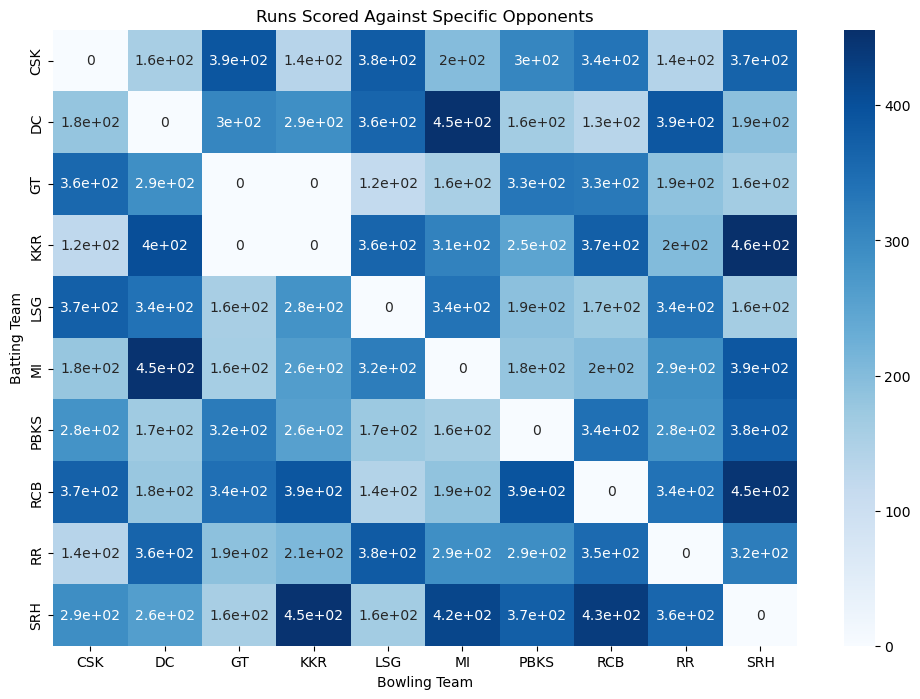

In [58]:
# Filter data for performance against specific opponents
team_performance_vs_opponents = deliveries_df.groupby(['batting_team', 'bowling_team'])['runs_of_bat'].sum().unstack().fillna(0)

print("Team Performance Against Specific Opponents:")
print(team_performance_vs_opponents)

# Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(team_performance_vs_opponents, annot=True, cmap='Blues')
plt.title('Runs Scored Against Specific Opponents')
plt.xlabel('Bowling Team')
plt.ylabel('Batting Team')
plt.show()


In [59]:
import pandas as pd

# Assuming the dataset is already loaded into deliveries_df
# deliveries_df = pd.read_csv('/path/to/ipl_2024_deliveries.csv')

# Number of sixes and fours in each match
sixes_per_match = deliveries_df[deliveries_df['runs_of_bat'] == 6].groupby('match_id').size()
fours_per_match = deliveries_df[deliveries_df['runs_of_bat'] == 4].groupby('match_id').size()

# Combine into a single DataFrame
boundary_per_match = pd.DataFrame({
    'Sixes': sixes_per_match,
    'Fours': fours_per_match
}).fillna(0).astype(int)

print("Sixes and Fours per Match:")
print(boundary_per_match.head())

# Number of sixes, fours, singles, and doubles by each player
sixes_by_player = deliveries_df[deliveries_df['runs_of_bat'] == 6].groupby('striker').size()
fours_by_player = deliveries_df[deliveries_df['runs_of_bat'] == 4].groupby('striker').size()
singles_by_player = deliveries_df[deliveries_df['runs_of_bat'] == 1].groupby('striker').size()
doubles_by_player = deliveries_df[deliveries_df['runs_of_bat'] == 2].groupby('striker').size()

# Combine into a single DataFrame
runs_by_player = pd.DataFrame({
    'Sixes': sixes_by_player,
    'Fours': fours_by_player,
    'Singles': singles_by_player,
    'Doubles': doubles_by_player
}).fillna(0).astype(int)

print("\nSixes, Fours, Singles, and Doubles by Player:")
print(runs_by_player.head())


Sixes and Fours per Match:
          Sixes  Fours
match_id              
202401       15     26
202402       13     35
202403       29     25
202404       19     21
202405       11     29

Sixes, Fours, Singles, and Doubles by Player:
               Sixes  Fours  Singles  Doubles
striker                                      
A Badoni           5     22       77       20
A Kamboj           0      0        2        0
A Manohar          0      1        3        1
A Nortje           0      0        2        1
A Raghuvanshi      8     16       44        2


<Figure size 1200x600 with 0 Axes>

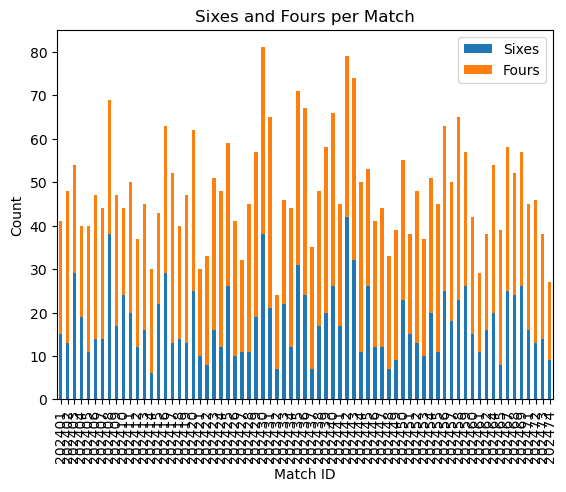

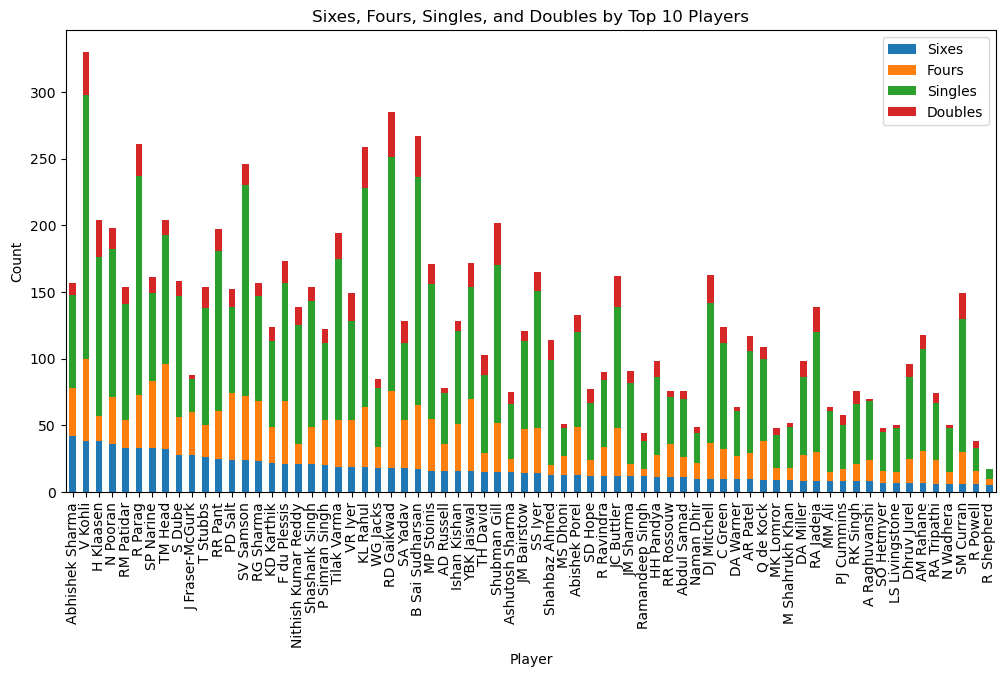

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization of Sixes and Fours per Match
plt.figure(figsize=(12, 6))
boundary_per_match.plot(kind='bar', stacked=True)
plt.title('Sixes and Fours per Match')
plt.xlabel('Match ID')
plt.ylabel('Count')
plt.show()

# Visualization of Runs Breakdown by Player (Top 10 Players)
top_players = runs_by_player.sort_values(by='Sixes', ascending=False).head(70)
top_players.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sixes, Fours, Singles, and Doubles by Top 10 Players')
plt.xlabel('Player')
plt.ylabel('Count')
plt.show()


ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [78]:
# Sum different types of extra runs for each bowler
extras_runs = deliveries_df.groupby('bowler')[['wide', 'noballs', 'legbyes', 'byes','extras']].sum()

# Calculate the total extras conceded by summing across the specific types of extras
extras_runs['Total Extras'] = extras_runs.sum(axis=1)

print("Extras Conceded by Each Bowler:")
print(extras_runs.head(10))


Extras Conceded by Each Bowler:
                 wide  noballs  legbyes  byes  extras  Total Extras
bowler                                                             
A Badoni            0        0        0     0       0             0
A Kamboj            6        2        1     0       9            18
A Mishra            0        0        0     0       0             0
A Nortje            7        1        3     1      12            24
AD Russell         12        0        7     1      21            41
AK Markram          0        1        0     0       1             2
AR Patel            1        0        3     0       4             8
AS Joseph           6        0        1     1      15            23
AS Roy              0        0        0     0       0             0
Abhishek Sharma     0        0        0     0       0             0


In [80]:
print(deliveries_df.columns)


Index(['match_id', 'season', 'match_no', 'date', 'venue', 'batting_team',
       'bowling_team', 'innings', 'over', 'striker', 'non_striker', 'bowler',
       'runs_of_bat', 'extras', 'wide', 'legbyes', 'byes', 'noballs',
       'wicket_type', 'player_dismissed', 'fielder'],
      dtype='object')


In [82]:
# Use the correct column names from your dataset
extras_columns = ['wide', 'noballs', 'legbyes', 'byes','extras']

# Group by bowler and sum the extras columns
extras_runs = deliveries_df.groupby('bowler')[extras_columns].sum()

# Calculate the total extras conceded by summing across the specific types of extras
extras_runs['Total Extras'] = extras_runs.sum(axis=1)

print("Extras Conceded by Each Bowler:")
print(extras_runs.head(10))


Extras Conceded by Each Bowler:
                 wide  noballs  legbyes  byes  extras  Total Extras
bowler                                                             
A Badoni            0        0        0     0       0             0
A Kamboj            6        2        1     0       9            18
A Mishra            0        0        0     0       0             0
A Nortje            7        1        3     1      12            24
AD Russell         12        0        7     1      21            41
AK Markram          0        1        0     0       1             2
AR Patel            1        0        3     0       4             8
AS Joseph           6        0        1     1      15            23
AS Roy              0        0        0     0       0             0
Abhishek Sharma     0        0        0     0       0             0


In [89]:
import pandas as pd

# Assuming the dataset is already loaded into deliveries_df
# deliveries_df = pd.read_csv('/path/to/ipl_2024_deliveries.csv')

# Filter data for sixes, fours, singles, and doubles conceded by each bowler
sixes_conceded = deliveries_df[deliveries_df['runs_of_bat'] == 6].groupby('bowler').size()
fours_conceded = deliveries_df[deliveries_df['runs_of_bat'] == 4].groupby('bowler').size()
singles_conceded = deliveries_df[deliveries_df['runs_of_bat'] == 1].groupby('bowler').size()
doubles_conceded = deliveries_df[deliveries_df['runs_of_bat'] == 2].groupby('bowler').size()

# Count wickets taken by each bowler (excluding 'run out')
wickets_taken = deliveries_df[(deliveries_df['player_dismissed'].notnull()) & (deliveries_df['player_dismissed'] != 'run out')].groupby('bowler').size()

# Count extras conceded by each bowler
extras_conceded = deliveries_df.groupby('bowler')['extras'].sum()

# Combine into a single DataFrame
bowler_performance = pd.DataFrame({
    'Sixes Conceded': sixes_conceded,
    'Fours Conceded': fours_conceded,
    'Singles Conceded': singles_conceded,
    'Doubles Conceded': doubles_conceded,
    'Wickets Taken': wickets_taken
    
}).fillna(0).astype(int)

print("Bowler Performance - Conceded Runs and Wickets:")
print(bowler_performance.head(10))

Bowler Performance - Conceded Runs and Wickets:
                 Sixes Conceded  Fours Conceded  Singles Conceded  \
bowler                                                              
A Badoni                      2               1                 7   
A Kamboj                      6              10                20   
A Mishra                      2               1                 4   
A Nortje                     22              25                38   
AD Russell                   20              20                54   
AK Markram                    1               0                 6   
AR Patel                     15              20               133   
AS Joseph                     8               7                18   
AS Roy                        2               9                 8   
Abhishek Sharma               0               6                21   

                 Doubles Conceded  Wickets Taken  
bowler                                            
A Badoni             

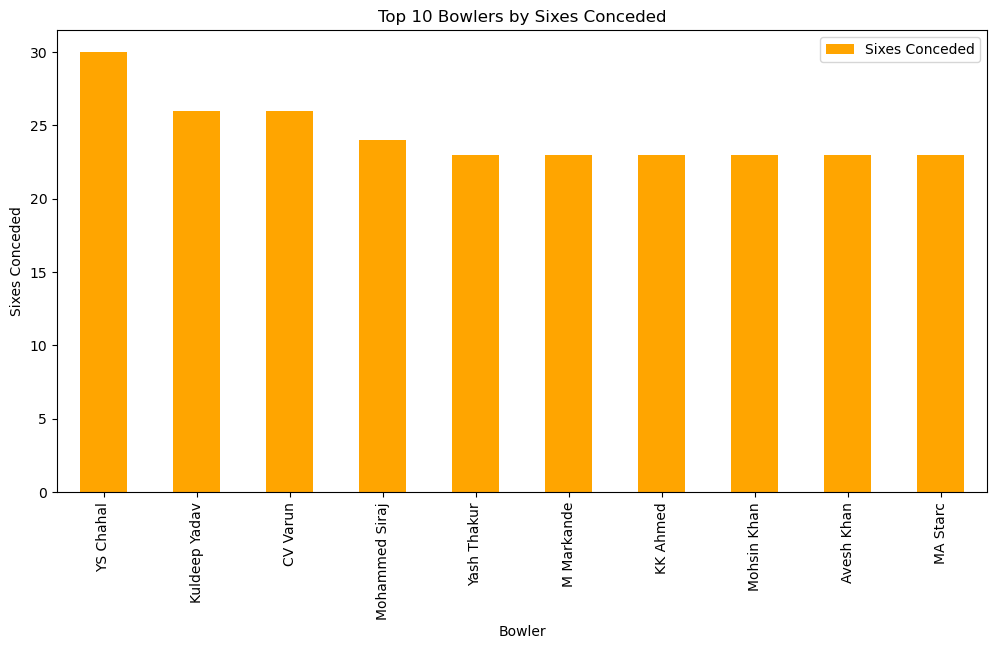

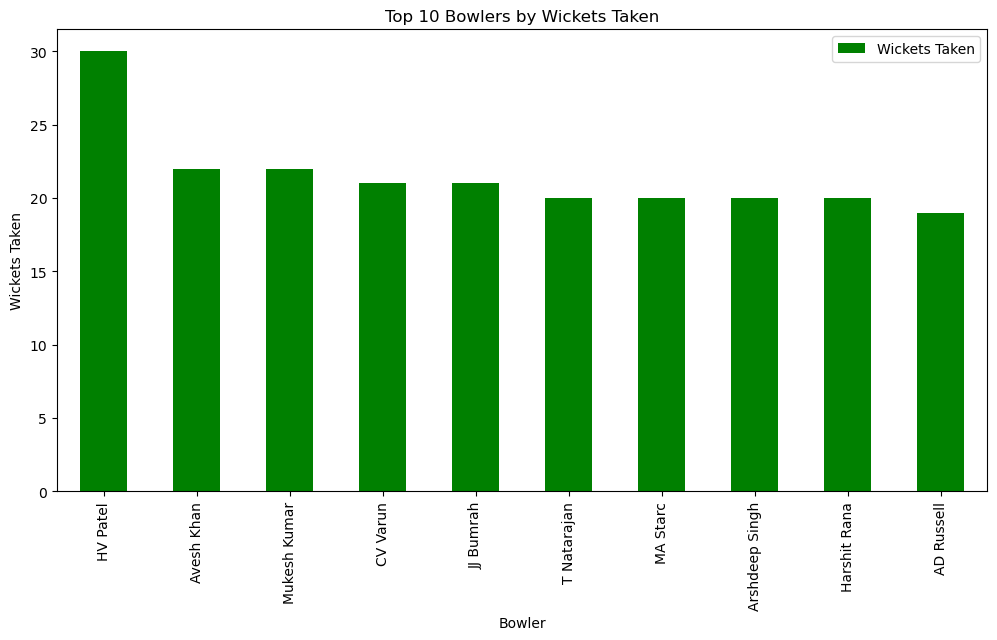

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the top bowlers by sixes conceded
top_sixes_conceded = bowler_performance.sort_values(by='Sixes Conceded', ascending=False).head(10)
top_sixes_conceded[['Sixes Conceded']].plot(kind='bar', color='orange', figsize=(12, 6))
plt.title('Top 10 Bowlers by Sixes Conceded')
plt.xlabel('Bowler')
plt.ylabel('Sixes Conceded')
plt.show()

# Visualize the top bowlers by wickets taken
top_wickets_taken = bowler_performance.sort_values(by='Wickets Taken', ascending=False).head(10)
top_wickets_taken[['Wickets Taken']].plot(kind='bar', color='green', figsize=(12, 6))
plt.title('Top 10 Bowlers by Wickets Taken')
plt.xlabel('Bowler')
plt.ylabel('Wickets Taken')
plt.show()
